In [3]:
import numpy
import pandas as pd

In [3]:
pip install matplotlib


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ----------------------------- ---------- 6.0/8.1 MB 30.7 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 27.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 24.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 2.7/2.7 MB 31.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


Question 1
Source:Zillow Home Value Index (ZHVI) for multiple U.S. regions from January 2000 to March 2025.

The file is loaded and the basic information is displayed.

In [344]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline

In [346]:
df = pd.read_csv("C:\\Users\\USER\\Q1.csv")
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Columns: 308 entries, RegionID to 3/31/2025
dtypes: float64(303), int64(2), object(3)
memory usage: 2.1+ MB


(None,
    RegionID  SizeRank       RegionName RegionType StateName    1/31/2000  \
 0    102001         0    United States    country       NaN  121667.5136   
 1    394913         1     New York, NY        msa        NY  217199.0405   
 2    753899         2  Los Angeles, CA        msa        CA  226479.9468   
 3    394463         3      Chicago, IL        msa        IL  153280.1740   
 4    394514         4       Dallas, TX        msa        TX  127756.4429   
 
      2/29/2000    3/31/2000    4/30/2000    5/31/2000  ...    6/30/2024  \
 0  121881.5658  122147.0220  122716.3734  123371.6286  ...  357820.2835   
 1  218122.0138  219053.5356  220941.1592  222895.8587  ...  662513.2592   
 2  227322.7395  228445.3315  230678.9123  233121.7494  ...  954450.5597   
 3  153422.0668  153692.3042  154364.5874  155173.2634  ...  321221.7183   
 4  127813.3461  127878.7621  128048.6406  128272.6208  ...  379104.4262   
 
      7/31/2024    8/31/2024    9/30/2024   10/31/2024   11/30/2024  \


1.The first step is to clean the dataset
Rows with missing region and state names are dropped

The dataset was reshaped using the melt()function to convert wide form date columns  into a long form structure. Each row now represents one region's home value at one date

Date columns are converted to time series format

Rows with missing or invalid date or value are dropped

In [356]:
# Drop rows with missing RegionName or StateName
df_clean = df.dropna(subset=["RegionName", "StateName"])

# Reshape the data to long format
df_melted = df_clean.melt(id_vars=["RegionID", "SizeRank", "RegionName", "RegionType", "StateName"],
                          var_name="Date", value_name="HomeValue")
# Convert date columns to datetime format
df_melted["Date"] = pd.to_datetime(df_melted["Date"])

# Drop any rows with missing or invalid date/value
df_melted = df_melted.dropna(subset=["Date", "HomeValue"])

2. Appreciation over the last 5 years is calculated

Define the date range for 5 year appreciation

The data for both dates were filtered. The Latest data point (March 2025) and the same month 5 years prior (March 2020).

The 5 year home value appreciation percentage is calculated using the formula below and the top 10 regions and states were extracted.
Appreciation% = (Value (2025) – Value (2020))/ Value(2020) * 100
			


In [358]:
# Define the date rage for 5 years appreciation
latest_date = df_melted["Date"].max()
five_years_ago = latest_date - pd.DateOffset(years=5)

# Filter for the two time points
df_recent = df_melted[df_melted["Date"].isin([five_years_ago, latest_date])]

# Pivot to compare values side by side
df_pivot = df_recent.pivot_table(index=["RegionName", "StateName"], 
                                  columns="Date", values="HomeValue").dropna()

# Calculate percent growth
df_pivot["5yr Appreciation %"] = ((df_pivot[latest_date] - df_pivot[five_years_ago]) / df_pivot[five_years_ago]) * 100

top10 = df_pivot.sort_values("5yr Appreciation %", ascending=False).head(10)
top10 = top10.reset_index()  # This brings RegionName and StateName back as columns
print(top10[["RegionName", "StateName", "5yr Appreciation %"]])

Date             RegionName StateName  5yr Appreciation %
0     Steamboat Springs, CO        CO           84.020592
1               Edwards, CO        CO           83.954930
2                Berlin, NH        NH           82.742000
3             Thomaston, GA        GA           82.463580
4             Kalispell, MT        MT           81.174519
5             Clewiston, FL        FL           79.009208
6             Cedartown, GA        GA           78.712085
7                Toccoa, GA        GA           78.637951
8               Laconia, NH        NH           77.250168
9               Augusta, ME        ME           77.181443


Plot 1: Bar Chart
This represents the top 10 U.S. regions from 2020 to 2025 which are ranked by appreciation percentage.

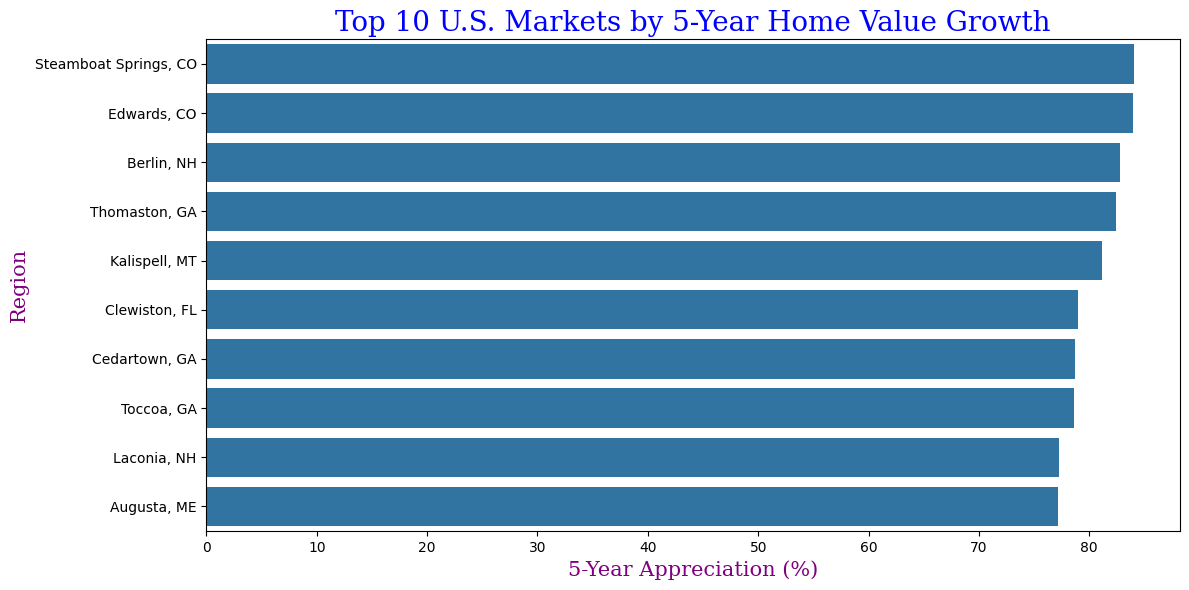

In [194]:
import seaborn as sns
import matplotlib.pyplot as plt
#P Barchat
top10 = df_pivot.sort_values("5yr Appreciation %", ascending=False).head(10)

font1= {'family':'serif','color':'blue','size':20}
font2= {'family':'serif','color':'purple','size':15}

plt.figure(figsize=(12,6))
sns.barplot(x="5yr Appreciation %", y=top10.index.get_level_values(0), data=top10)
plt.title("Top 10 U.S. Markets by 5-Year Home Value Growth", fontdict=font1)
plt.xlabel("5-Year Appreciation (%)", fontdict=font2)
plt.ylabel("Region", fontdict=font2)
plt.tight_layout()
plt.show()

Plot 2: Line Chart
Plot 3: Boxplot
These visualizations identify the top U.S. markets 

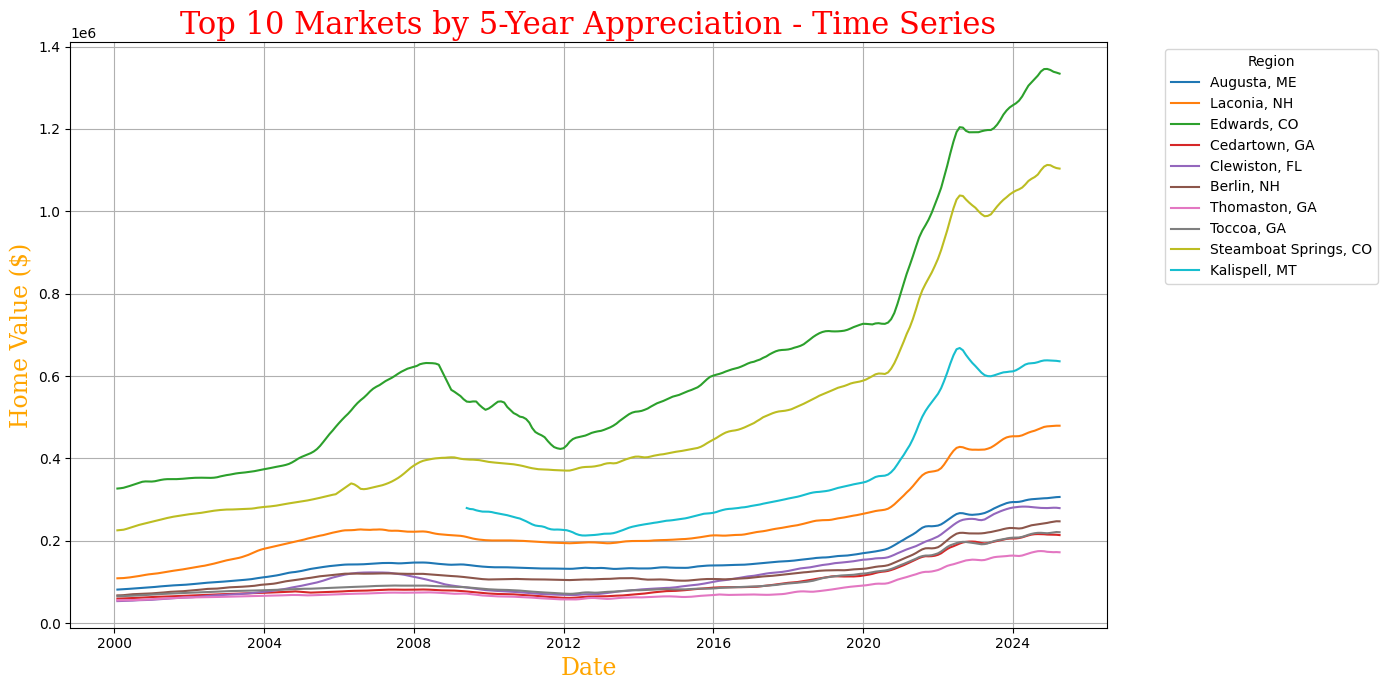

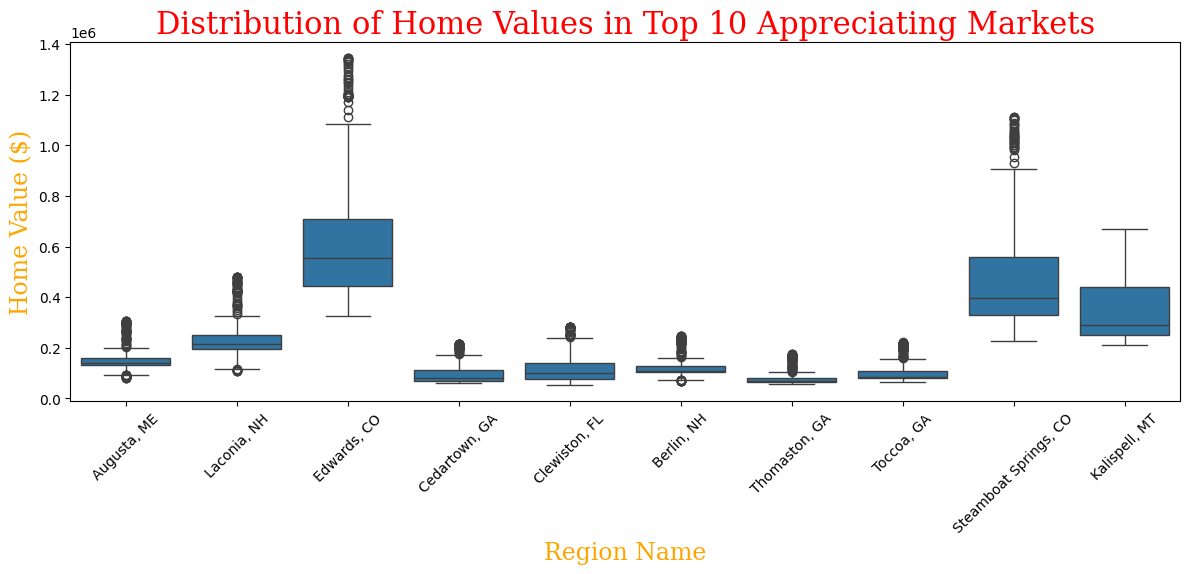

In [196]:
# Line chart
plt.figure(figsize=(14, 7))
sns.lineplot(data=top10_data, x="Date", y="HomeValue", hue="RegionName")
font1= {'family':'serif','color':'red','size':22}
font2= {'family':'serif','color':'orange','size':17} 
plt.title("Top 10 Markets by 5-Year Appreciation - Time Series", fontdict=font1)
plt.ylabel("Home Value ($)", fontdict=font2)
plt.xlabel("Date", fontdict=font2)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=top10_data, x="RegionName", y="HomeValue")
plt.xticks(rotation=45)
font1= {'family':'serif','color':'red','size':22}
font2= {'family':'serif','color':'orange','size':17}
plt.title("Distribution of Home Values in Top 10 Appreciating Markets", fontdict=font1)
plt.ylabel("Home Value ($)", fontdict=font2)
plt.xlabel("Region Name", fontdict=font2)
plt.tight_layout()
plt.show()

3. Insights and Recommendations

It can be seen that the top performing real estate markets in the U.S. are both Steamboat Springs and Edwards in Colorado with high potentials for rentals and resale.

It is then followed by Georgia, New Hampshire and Maine. 

These areas will  be perfect to buy, upgrade and rent/sell.

Question 5

Source: Metro_sales_count_now_uc_sfrcondo_month(Q5) 
Metro_new_homeowner_income_needed_downpayment_0.20_uc_sfrcondo_tier_0.33_0.67_sm_sa_month(Q5A)

Two datasets were used in this analysis.

The files are loaded and the basic information for each dataset is displayed

1.The first step is to clean the dataset
Rows with missing region and state names are dropped
Date columns are converted to time series format

In [360]:
import pandas as pd
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt             
%matplotlib inline
q5_df = pd.read_csv("C:\\Users\\USER\\Q5A.csv")
q5a_df = pd.read_csv("C:\\Users\\USER\\Q5.csv")

In [200]:
import pandas as pd

# Load the datasets
file_paths = ["C:\\Users\\USER\\Q5A.csv", "C:\\Users\\USER\\Q5.csv"]
dfs = [pd.read_csv(path) for path in file_paths]

# Display basic info and first few rows of each dataframe to understabd the structure
info = [(df.shape, df.columns.tolist(), df.head()) for df in dfs]
info

[((390, 164),
  ['RegionID',
   'SizeRank',
   'RegionName',
   'RegionType',
   'StateName',
   '1/31/2012',
   '2/29/2012',
   '3/31/2012',
   '4/30/2012',
   '5/31/2012',
   '6/30/2012',
   '7/31/2012',
   '8/31/2012',
   '9/30/2012',
   '10/31/2012',
   '11/30/2012',
   '12/31/2012',
   '1/31/2013',
   '2/28/2013',
   '3/31/2013',
   '4/30/2013',
   '5/31/2013',
   '6/30/2013',
   '7/31/2013',
   '8/31/2013',
   '9/30/2013',
   '10/31/2013',
   '11/30/2013',
   '12/31/2013',
   '1/31/2014',
   '2/28/2014',
   '3/31/2014',
   '4/30/2014',
   '5/31/2014',
   '6/30/2014',
   '7/31/2014',
   '8/31/2014',
   '9/30/2014',
   '10/31/2014',
   '11/30/2014',
   '12/31/2014',
   '1/31/2015',
   '2/28/2015',
   '3/31/2015',
   '4/30/2015',
   '5/31/2015',
   '6/30/2015',
   '7/31/2015',
   '8/31/2015',
   '9/30/2015',
   '10/31/2015',
   '11/30/2015',
   '12/31/2015',
   '1/31/2016',
   '2/29/2016',
   '3/31/2016',
   '4/30/2016',
   '5/31/2016',
   '6/30/2016',
   '7/31/2016',
   '8/31/2016'

The raw preview below of the dataset Q5A.csv shows that the file is tab-delimiter rather than 
comma-delimiter.

In [362]:
# Load Q5A.csv again with no delimiter assumption to inspect its raw structure
with open("C:\\Users\\USER\\Q5A.csv", "r") as file:
    raw_preview = [next(file) for _ in range(5)]

raw_preview

['RegionID,SizeRank,RegionName,RegionType,StateName,1/31/2012,2/29/2012,3/31/2012,4/30/2012,5/31/2012,6/30/2012,7/31/2012,8/31/2012,9/30/2012,10/31/2012,11/30/2012,12/31/2012,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,9/30/2013,10/31/2013,11/30/2013,12/31/2013,1/31/2014,2/28/2014,3/31/2014,4/30/2014,5/31/2014,6/30/2014,7/31/2014,8/31/2014,9/30/2014,10/31/2014,11/30/2014,12/31/2014,1/31/2015,2/28/2015,3/31/2015,4/30/2015,5/31/2015,6/30/2015,7/31/2015,8/31/2015,9/30/2015,10/31/2015,11/30/2015,12/31/2015,1/31/2016,2/29/2016,3/31/2016,4/30/2016,5/31/2016,6/30/2016,7/31/2016,8/31/2016,9/30/2016,10/31/2016,11/30/2016,12/31/2016,1/31/2017,2/28/2017,3/31/2017,4/30/2017,5/31/2017,6/30/2017,7/31/2017,8/31/2017,9/30/2017,10/31/2017,11/30/2017,12/31/2017,1/31/2018,2/28/2018,3/31/2018,4/30/2018,5/31/2018,6/30/2018,7/31/2018,8/31/2018,9/30/2018,10/31/2018,11/30/2018,12/31/2018,1/31/2019,2/28/2019,3/31/2019,4/30/2019,5/31/2019,6/30/2019,7/31/2019,8/31/2019,9/30/20

2. The dataset. Q5A.csv is re-loaded with the correct delimiter below.
   
The first few rows are displayed

In [364]:
# Load the dataset again with the correct tab delimiter
q5a_cleaned_df = pd.read_csv("C:\\Users\\USER\\Q5A.csv", delimiter="\t")

# Display the first few rows to verify correct loading
q5a_cleaned_df.head()

,"RegionID,SizeRank,RegionName,RegionType,StateName,1/31/2012,2/29/2012,3/31/2012,4/30/2012,5/31/2012,6/30/2012,7/31/2012,8/31/2012,9/30/2012,10/31/2012,11/30/2012,12/31/2012,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,9/30/2013,10/31/2013,11/30/2013,12/31/2013,1/31/2014,2/28/2014,3/31/2014,4/30/2014,5/31/2014,6/30/2014,7/31/2014,8/31/2014,9/30/2014,10/31/2014,11/30/2014,12/31/2014,1/31/2015,2/28/2015,3/31/2015,4/30/2015,5/31/2015,6/30/2015,7/31/2015,8/31/2015,9/30/2015,10/31/2015,11/30/2015,12/31/2015,1/31/2016,2/29/2016,3/31/2016,4/30/2016,5/31/2016,6/30/2016,7/31/2016,8/31/2016,9/30/2016,10/31/2016,11/30/2016,12/31/2016,1/31/2017,2/28/2017,3/31/2017,4/30/2017,5/31/2017,6/30/2017,7/31/2017,8/31/2017,9/30/2017,10/31/2017,11/30/2017,12/31/2017,1/31/2018,2/28/2018,3/31/2018,4/30/2018,5/31/2018,6/30/2018,7/31/2018,8/31/2018,9/30/2018,10/31/2018,11/30/2018,12/31/2018,1/31/2019,2/28/2019,3/31/2019,4/30/2019,5/31/2019,6/30/2019,7/31/2019,8/31/2019,9/30/2019,10/31/2019,11/30/2019,12/31/2019,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,6/30/2020,7/31/2020,8/31/2020,9/30/2020,10/31/2020,11/30/2020,12/31/2020,1/31/2021,2/28/2021,3/31/2021,4/30/2021,5/31/2021,6/30/2021,7/31/2021,8/31/2021,9/30/2021,10/31/2021,11/30/2021,12/31/2021,1/31/2022,2/28/2022,3/31/2022,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023,8/31/2023,9/30/2023,10/31/2023,11/30/2023,12/31/2023,1/31/2024,2/29/2024,3/31/2024,4/30/2024,5/31/2024,6/30/2024,7/31/2024,8/31/2024,9/30/2024,10/31/2024,11/30/2024,12/31/2024,1/31/2025,2/28/2025,3/31/2025"
0,"102001,0,United States,country,,36865.58726,36..."
1,"394913,1,""New York, NY"",msa,NY,95611.66468,952..."
2,"753899,2,""Los Angeles, CA"",msa,CA,76970.08466,..."
3,"394463,3,""Chicago, IL"",msa,IL,46641.21756,4623..."
4,"394514,4,""Dallas, TX"",msa,TX,38295.81642,38271..."


3.The first row of this data (q5a_df ) is incorrectly treated as a single string column due to the formatting. 

To fix this, the file has to be read with the right seperator and header handling.

In [366]:
import pandas as pd

# Reload both datasets
q5_df = pd.read_csv("C:\\Users\\USER\\Q5.csv")
# Re-read the file with the correct seperator and header handling
q5a_df = pd.read_csv("C:\\Users\\USER\\Q5A.csv", delimiter=",", engine="python")

4.The preview of the first few rows shows that both datasets have the name 'StateName' instead of'State'. 

'StateName' has to be renamed to 'State' in order to merge both datasets correctly for consistency.

In [368]:
print("Q5 columns:", q5_df.columns)
print("Q5A columns:", q5a_df.columns)

Q5 columns: Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       '2/29/2008', '3/31/2008', '4/30/2008', '5/31/2008', '6/30/2008',
       ...
       '6/30/2024', '7/31/2024', '8/31/2024', '9/30/2024', '10/31/2024',
       '11/30/2024', '12/31/2024', '1/31/2025', '2/28/2025', '3/31/2025'],
      dtype='object', length=211)
Q5A columns: Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       '1/31/2012', '2/29/2012', '3/31/2012', '4/30/2012', '5/31/2012',
       ...
       '6/30/2024', '7/31/2024', '8/31/2024', '9/30/2024', '10/31/2024',
       '11/30/2024', '12/31/2024', '1/31/2025', '2/28/2025', '3/31/2025'],
      dtype='object', length=164)


In [370]:
# Rename StateName to State
q5_df = q5_df.rename(columns={"StateName": "State"})
q5a_df = q5a_df.rename(columns={"StateName": "State"})

In [372]:
# Rename 'StateName' to 'State' if needed
if 'StateName' in q5_df.columns:
    q5_df = q5_df.rename(columns={"StateName": "State"})

if 'StateName' in q5a_df.columns:
    q5a_df = q5a_df.rename(columns={"StateName": "State"})

The display of the rows shows the Statename renamed to State.

In [74]:
# Preview first few columns
print("Q5 columns:", q5_df.columns)
print("Q5A columns:", q5a_df.columns)

Q5 columns: Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'State',
       '2/29/2008', '3/31/2008', '4/30/2008', '5/31/2008', '6/30/2008',
       ...
       '6/30/2024', '7/31/2024', '8/31/2024', '9/30/2024', '10/31/2024',
       '11/30/2024', '12/31/2024', '1/31/2025', '2/28/2025', '3/31/2025'],
      dtype='object', length=211)
Q5A columns: Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'State',
       '1/31/2012', '2/29/2012', '3/31/2012', '4/30/2012', '5/31/2012',
       ...
       '6/30/2024', '7/31/2024', '8/31/2024', '9/30/2024', '10/31/2024',
       '11/30/2024', '12/31/2024', '1/31/2025', '2/28/2025', '3/31/2025'],
      dtype='object', length=164)


5. Next, we have to extract the earliest and latest prices from each dataset to compute the trends and ROI. 

In [374]:
# Extract initial and latest prices for ROI calculation
q5_df["InitialPrice"] = q5_df["2/29/2008"]
q5_df["LatestPrice"] = q5_df["3/31/2025"]

q5a_df["InitialPrice"] = q5a_df["1/31/2012"]
q5a_df["LatestPrice"] = q5a_df["3/31/2025"]

6. After, the two datasets are merged on the State columnn.

Only the State level growth information from the q5a_df is merged and not the full dataset. It helps evaluate performance and ROI by region.

Clean the data 

In [382]:
# Aggregate state-level data from Q5A
q5a_state_avg = q5a_df.groupby("State")[["InitialPrice", "LatestPrice"]].mean().reset_index()
q5a_state_avg = q5a_state_avg.rename(columns={
    "InitialPrice": "StateInitialAvgPrice",
    "LatestPrice": "StateLatestAvgPrice"
})

In [384]:
# Merge using aggregated Q5A data (q5a_state_avg, NOT q5a_df)
merged_df = pd.merge(q5_df, q5a_state_avg, on="State", how="left")

# Clean data
merged_df = merged_df.dropna(subset=["InitialPrice", "LatestPrice"])
merged_df = merged_df[merged_df["InitialPrice"] > 1000] 

Calculate the ROI and Profit and identify top states and cities using the formula below

ROI(%) = ((LatestPrice - InitialPrice)/ InitialPrice) * 100
Profit = LatestPrice -InitialPrice

Plot 1: Bar Chart
This shows the top States by ROI

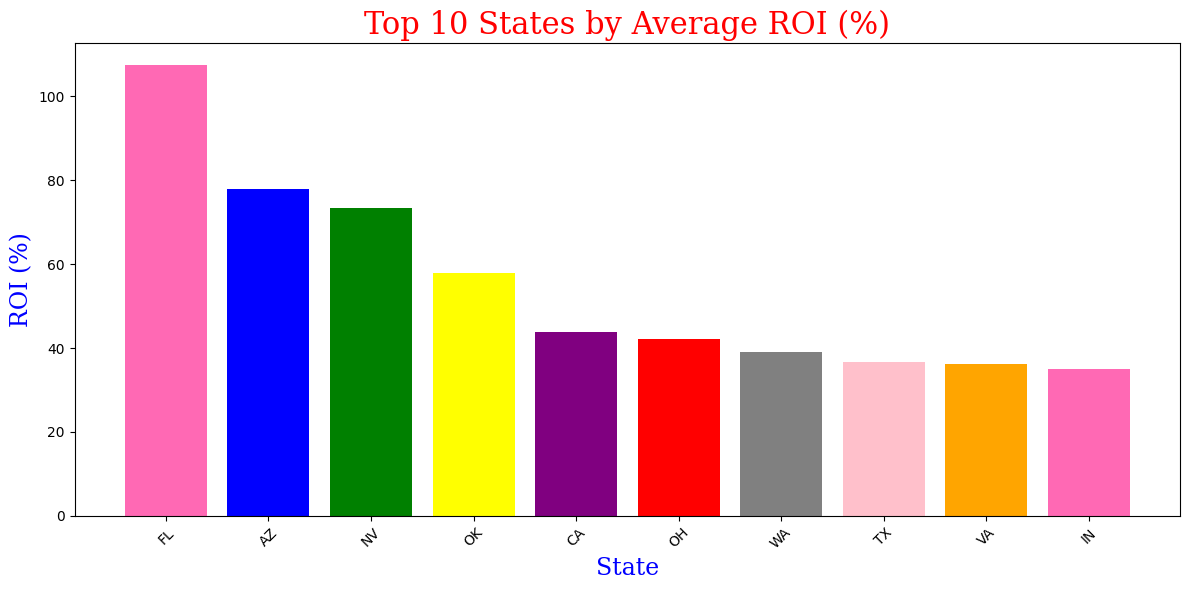

In [386]:
# Calculate ROI and profit
merged_df["Profit"] = merged_df["LatestPrice"] - merged_df["InitialPrice"]
merged_df["ROI (%)"] = (merged_df["Profit"] / merged_df["InitialPrice"]) * 100

# Identify top cities and states
top_cities = merged_df.sort_values(by="ROI (%)", ascending=False).head(10)
top_states = merged_df.groupby("State")["ROI (%)"].mean().sort_values(ascending=False).head(10).reset_index()

import numpy as np
import matplotlib.pyplot as plt

# Visualize ROI by State (Top 10)
plt.figure(figsize=(12, 6))
font1= {'family':'serif','color':'red','size':22}
font2= {'family':'serif','color':'blue','size':17}
myColors = np.array(['hotpink','blue','green','yellow','purple', 'red', 'grey', 'pink','orange'])
plt.bar(top_states["State"], top_states["ROI (%)"], color=myColors)
plt.title("Top 10 States by Average ROI (%)", fontdict=font1)
plt.ylabel("ROI (%)", fontdict=font2)
plt.xlabel("State", fontdict=font2)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
Plot 2: Horizontal Bar Chart
It visualizes the top 10 Cities by ROI

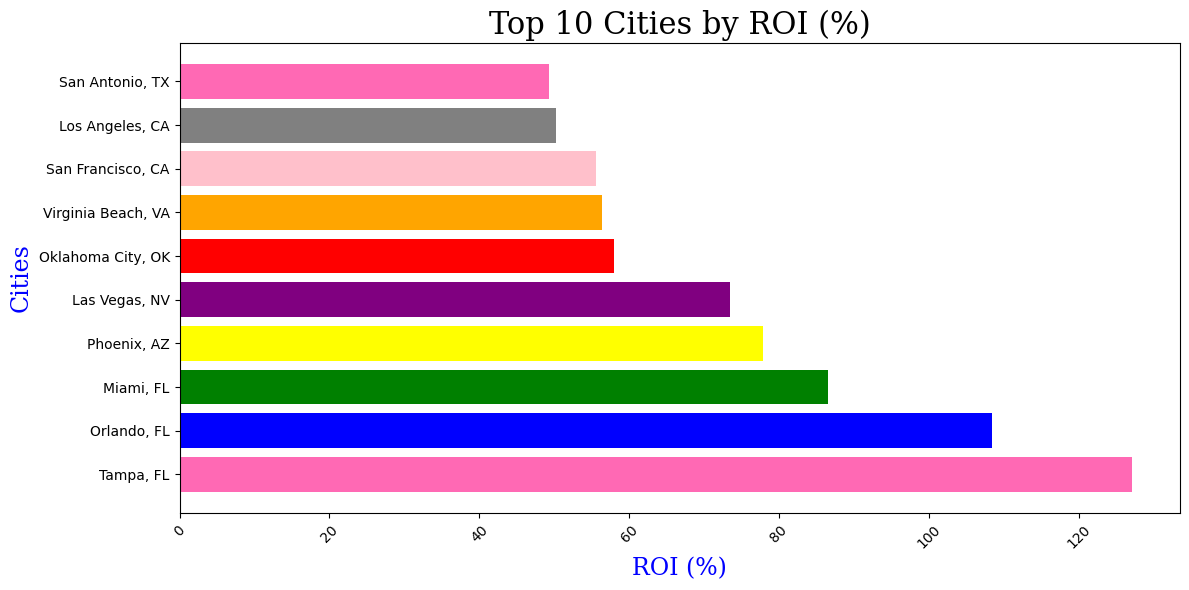

(            RegionName State     ROI (%)  Profit
 18           Tampa, FL    FL  127.185399    2648
 22         Orlando, FL    FL  108.487085    1470
 8            Miami, FL    FL   86.614173    3410
 11         Phoenix, AZ    AZ   77.942410    2788
 30       Las Vegas, NV    NV   73.490977    1181
 41   Oklahoma City, OK    OK   57.934990     606
 37  Virginia Beach, VA    VA   56.414219     730
 12   San Francisco, CA    CA   55.637126    1061
 2      Los Angeles, CA    CA   50.205463    2077
 24     San Antonio, TX    TX   49.274125     577,
   State     ROI (%)
 0    FL  107.428886
 1    AZ   77.942410
 2    NV   73.490977
 3    OK   57.934990
 4    CA   43.832773
 5    OH   42.227347
 6    WA   39.157325
 7    TX   36.741610
 8    VA   36.161345
 9    IN   34.894614)

In [390]:
# Visualize ROI by City (Top 10)
plt.figure(figsize=(12, 6))
font1= {'family':'serif','color':'black','size':22}
font2= {'family':'serif','color':'blue','size':17}   
myColors= np.array(['hotpink','blue','green','yellow','purple', 'red', 'orange', 'pink','grey'])
plt.barh(top_cities["RegionName"], top_cities["ROI (%)"], color=myColors)
plt.title("Top 10 Cities by ROI (%)", fontdict=font1)
plt.ylabel("Cities", fontdict=font2)
plt.xlabel("ROI (%)", fontdict=font2)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Return the top cities and states
top_cities[["RegionName", "State", "ROI (%)", "Profit"]], top_states

Plot 3: Scatter Plot

This chart demonstrates how ROI correlates with current prices

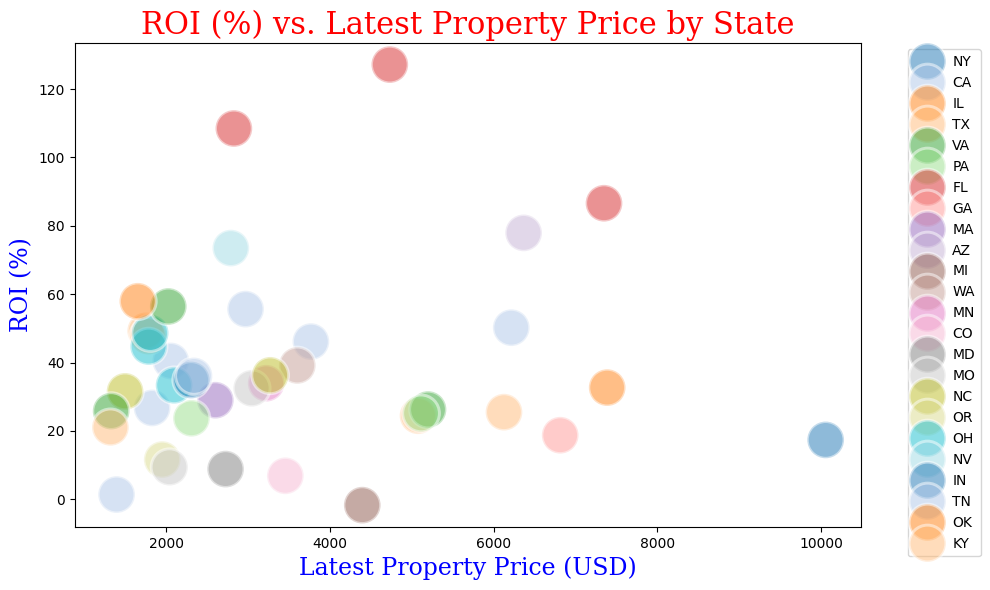

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

font1= {'family':'serif','color':'red','size':22}
font2= {'family':'serif','color':'blue','size':17}

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x="LatestPrice", y="ROI (%)", hue="State", palette="tab20", alpha=0.5, s=700)
plt.title("ROI (%) vs. Latest Property Price by State", fontdict=font1)
plt.xlabel("Latest Property Price (USD)", fontdict=font2)
plt.ylabel("ROI (%)", fontdict=font2)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Plot 4: BoxPlot
This is the ROI distribution by State. 

It identifies both ROI and volatility across properties

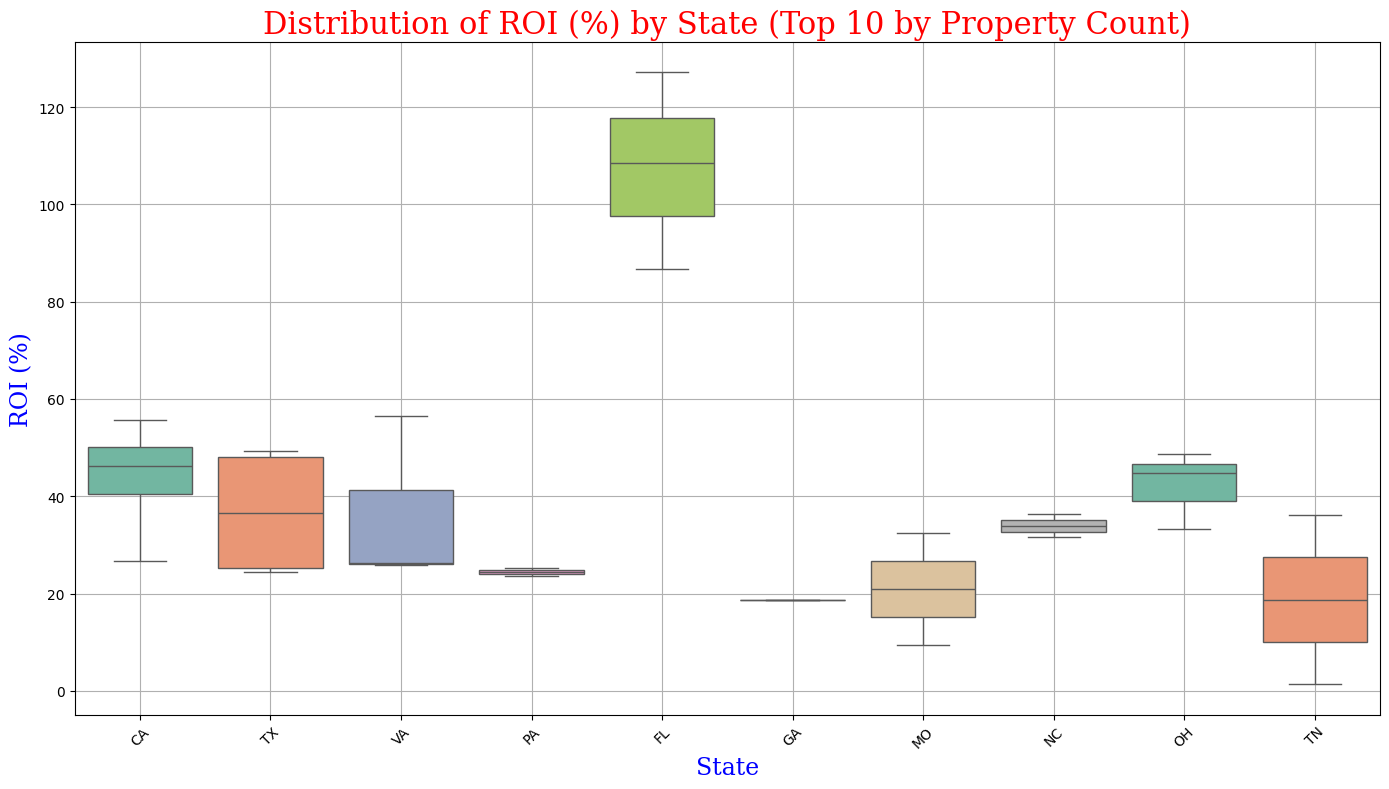

In [91]:
plt.figure(figsize=(14, 8))
top_states_by_count = merged_df['State'].value_counts().nlargest(10).index
sns.boxplot(data=merged_df[merged_df['State'].isin(top_states_by_count)],
            x='State', y='ROI (%)',  hue="State", palette='Set2')

font1= {'family':'serif','color':'red','size':22}
font2= {'family':'serif','color':'blue','size':17}
plt.title("Distribution of ROI (%) by State (Top 10 by Property Count)", fontdict=font1)
plt.ylabel("ROI (%)", fontdict=font2)
plt.xlabel("State", fontdict=font2)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.show()

Assumptions for Mortgage and Sale Profit Calculation

Mortgage Down Payment: 20%
Annual interest: 6.5%
Holding Period: 5 years
80% financed by mortgage
30 year fixed mortgage 
Sale after 5 years with 6% yearly appreciation

In [394]:
# Estimates
interest_rate = 0.065
loan_term_years = 30
years_held = 5
down_payment_pct = 0.20
loan_pct = 0.80

# Step 1: Mortgage payment formula
def annual_mortgage_interest(principal, rate, years):
    return principal * rate  # Simplified as we’re approximating interest only over early years

# Step 2: Apply to merged dataset
merged_df['PurchasePrice'] = merged_df['InitialPrice']
merged_df['SalePrice'] = merged_df['LatestPrice']
merged_df['LoanAmount'] = merged_df['PurchasePrice'] * loan_pct

# Estimate total interest paid over 5 years
merged_df['TotalInterestPaid'] = annual_mortgage_interest(
    merged_df['LoanAmount'], interest_rate, loan_term_years) * years_held

# Step 3: Calculate profit and ROI
merged_df['Profit'] = (merged_df['SalePrice'] - merged_df['PurchasePrice'] - merged_df['TotalInterestPaid'])
merged_df['ROI (%)'] = (merged_df['Profit'] / (merged_df['PurchasePrice'] * down_payment_pct)) * 100

# Step 4: Final average ROI and profit
average_profit = merged_df['Profit'].mean()
average_roi = merged_df['ROI (%)'].mean()

print(f" Average Profit per Property (after mortgage): ${average_profit:,.2f}")
print(f" Average ROI on Cash Invested: {average_roi:.2f}%")

 Average Profit per Property (after mortgage): $879.69
 Average ROI on Cash Invested: 62.96%


Insight and Recommendation

From the visuals above, Florida,especially Tampa, Orlando, and Miami and Arizona, Phoenix stand out as excellent locations for both rental and resale strategies based on ROI trends.

Florida, Arizona and Nevada are top investment markets based on  ROI. They align with the investment strategies of buying, renovating, renting or selling due to high ROI, profits and market liquidity.

Question 4
Source: Days on Market (DOM) from March 2018 to March 2025 across U.S. regions (ZillowHomes)

The file is loaded and the basic information is displayed

1.The first step is to clean the dataset
Rows with missing region and state names are dropped
Date columns are converted to time series format

In [310]:
import pandas as pd

# Load the uploaded dataset
file_path = ("C:\\Users\\USER\\Q4.csv")
df = pd.read_csv(file_path)

# Display basic info and preview the data
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 90 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionID    740 non-null    int64  
 1   SizeRank    740 non-null    int64  
 2   RegionName  740 non-null    object 
 3   RegionType  740 non-null    object 
 4   StateName   739 non-null    object 
 5   3/31/2018   366 non-null    float64
 6   4/30/2018   369 non-null    float64
 7   5/31/2018   369 non-null    float64
 8   6/30/2018   370 non-null    float64
 9   7/31/2018   372 non-null    float64
 10  8/31/2018   373 non-null    float64
 11  9/30/2018   373 non-null    float64
 12  10/31/2018  374 non-null    float64
 13  11/30/2018  379 non-null    float64
 14  12/31/2018  381 non-null    float64
 15  1/31/2019   393 non-null    float64
 16  2/28/2019   395 non-null    float64
 17  3/31/2019   399 non-null    float64
 18  4/30/2019   400 non-null    float64
 19  5/31/2019   400 non-null    f

(None,
    RegionID  SizeRank       RegionName RegionType StateName  3/31/2018  \
 0    102001         0    United States    country       NaN       51.0   
 1    394913         1     New York, NY        msa        NY       68.0   
 2    753899         2  Los Angeles, CA        msa        CA       35.0   
 3    394463         3      Chicago, IL        msa        IL       51.0   
 4    394514         4       Dallas, TX        msa        TX       46.0   
 
    4/30/2018  5/31/2018  6/30/2018  7/31/2018  ...  6/30/2024  7/31/2024  \
 0       48.0       45.0       43.0       44.0  ...       37.0       38.0   
 1       65.0       63.0       64.0       66.0  ...       49.0       49.0   
 2       32.0       31.0       32.0       33.0  ...       29.0       30.0   
 3       44.0       40.0       39.0       40.0  ...       24.0       24.0   
 4       42.0       38.0       37.0       38.0  ...       38.0       40.0   
 
    8/31/2024  9/30/2024  10/31/2024  11/30/2024  12/31/2024  1/31/2025  \
 0

In [312]:
# Drop rows with missing region/state names
df_clean = df.dropna(subset=['RegionName', 'StateName'])

# Convert date columns to time series format
df_timeseries = df_clean.set_index(['RegionName', 'StateName']).iloc[:, 4:].T
df_timeseries.index = pd.to_datetime(df_timeseries.index)

2. Market trends are analyzed

In this section, we find the fastest growing markets (the price decrease in days on market) and stable rental or sales markets.

Visualize the top 10 fastest market based on the decreasing days on market where the most negative represents fastest markets.

In [314]:
#Fastest-growing markets (Most negative changes = faster markets)
growth = df_timeseries.iloc[-1] - df_timeseries.iloc[0]
fastest_markets = growth.sort_values().head(15)
print(fastest_markets)

RegionName            StateName
Cumberland, MD        MD          -50.0
Peoria, IL            IL          -47.0
Decatur, IL           IL          -46.0
California, MD        MD          -43.0
New Philadelphia, OH  OH          -42.0
Erie, PA              PA          -42.0
Syracuse, NY          NY          -41.0
Allentown, PA         PA          -38.0
Minot, ND             ND          -38.0
Gettysburg, PA        PA          -38.0
Youngstown, OH        OH          -36.0
Ashtabula, OH         OH          -35.0
Sterling, IL          IL          -34.0
Champaign, IL         IL          -34.0
Springfield, IL       IL          -33.0
dtype: float64


Plot 1: Line Chart

This shows how the fastest markets are reducing (Days on Market) over time. It tracks the trending speed of sales or rentals in top regions

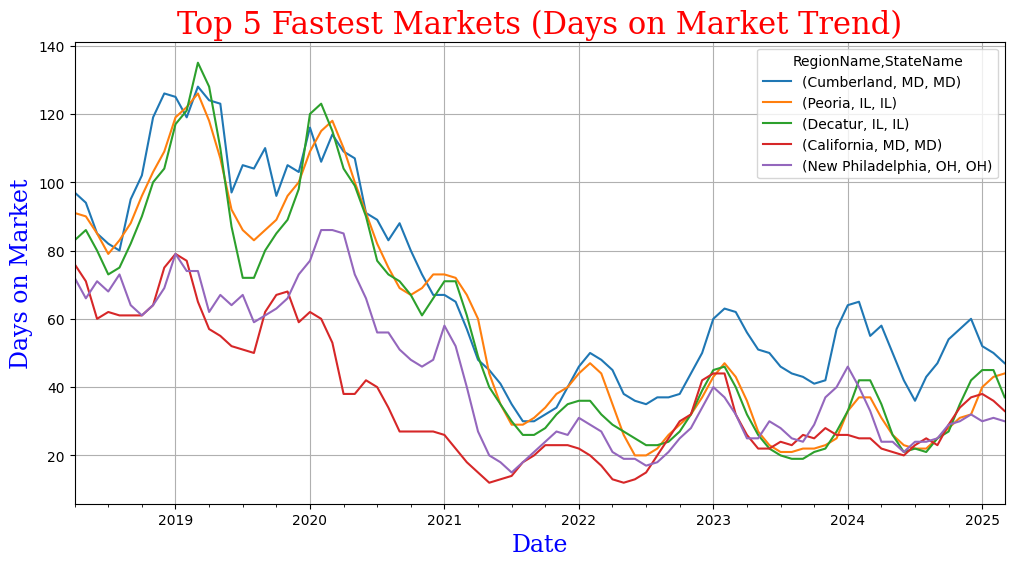

In [316]:
# Line chart of Top 5 Fastest Growing Markets
import matplotlib.pyplot as plt

top_regions = fastest_markets.index[:5]
df_timeseries[top_regions].plot(figsize=(12, 6))
font1 = {'family': 'serif', 'color': 'red', 'size': 22}
font2 = {'family': 'serif', 'color': 'blue', 'size': 17}
plt.title("Top 5 Fastest Markets (Days on Market Trend)", fontdict=font1)
plt.ylabel("Days on Market", fontdict=font2)
plt.xlabel("Date", fontdict=font2)
plt.grid()
plt.show()

Plot 2: Bar Chart

The chart ranks the top 10 fastest growing markets based on how quickly homes sell or rent. 

It shows the regions with the biggest drop in days on market with the most negative representing the fastest markets.

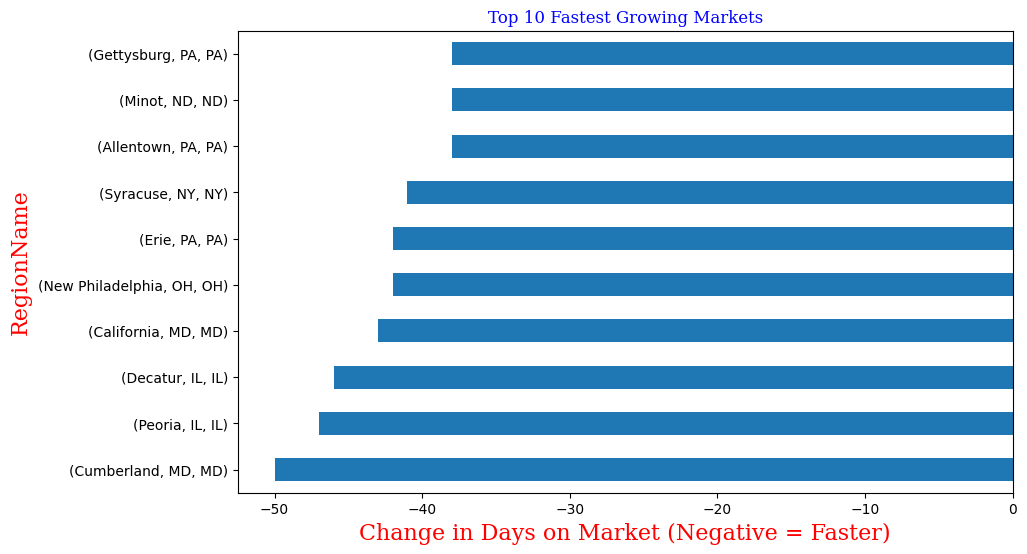

In [318]:
# Bar Chart of Top 10 Fastest Growing Regions
fastest_10 = growth.sort_values().head(10)
fastest_10.plot(kind='barh', figsize=(10, 6))

font1 = {'family': 'serif', 'color': 'red', 'size': 16}
font2 = {'family': 'serif', 'color': 'blue', 'size': 12}
plt.title("Top 10 Fastest Growing Markets", fontdict=font2,)
plt.xlabel("Change in Days on Market (Negative = Faster)", fontdict=font1)
plt.ylabel("RegionName", fontdict=font1)
plt.show()

Plot 3: Scatter Plot 

The visual below compares the Speed and Volatility across markets to find the right regions for investment(markets that are fast moving and stable).

We calculate the overall price increase for each region from the month to the last month in the dataset. It is the total price growth over time, known as the "Speed".

The volatility computes the standard deviation of prices for each region which reflects how much prices fluctuate over time. 

Creating a summary dataframe combines both metrics(the speed and volatility) into a single dataframe.


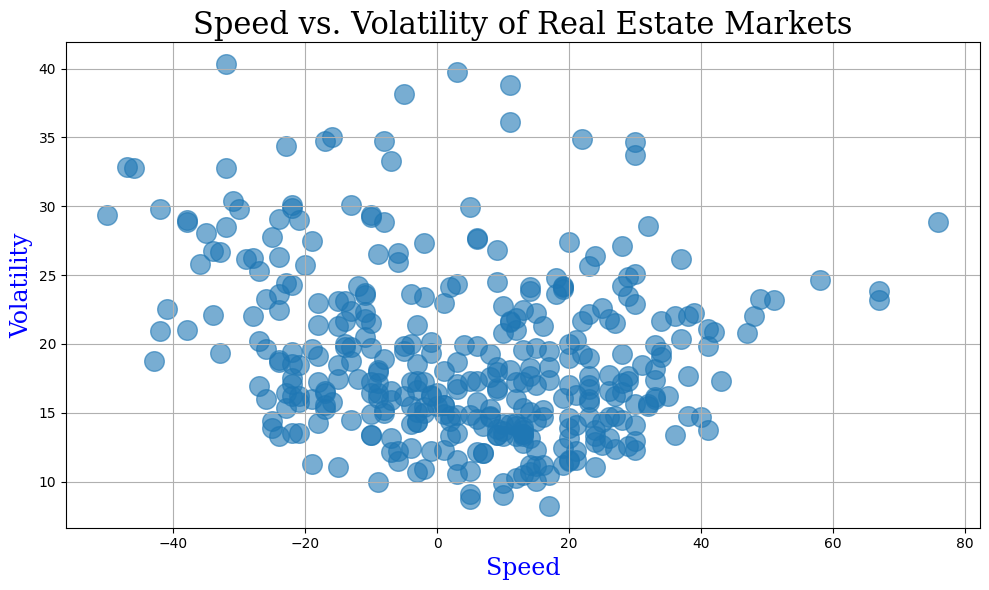

In [236]:
# Plot 3: Scatter Plot of Speed vs. Volatility
# calculate the growth and volatility
growth = df_timeseries.iloc[-1] - df_timeseries.iloc[0]
volatility = df_timeseries.std()

# Create the summary DataFrame
summary = pd.DataFrame({'Speed': growth,'Volatility': volatility})

summary.plot.scatter(x='Speed', y='Volatility', alpha=0.6, s=200,figsize=(10, 6))
font1 = {'family': 'serif', 'color': 'black', 'size': 22}
font2 = {'family': 'serif', 'color': 'blue', 'size': 17}
plt.title("Speed vs. Volatility of Real Estate Markets", fontdict=font1)
plt.xlabel("Speed", fontdict=font2)
plt.ylabel("Volatility", fontdict=font2)
plt.grid(True)
plt.tight_layout()
plt.show()

Insight and Recommendation

The line chart showed consistent downward slope across all 5 regions, that is, Cumberland, Peoria, Decatur, California and New Philadelphia, which indicates strong aand sustained demands. No sudden spikes suggest market stability making them attractive for buying, renovating, selling/ renting strategy.

The Bar Chart shows the market speed. That is markets with the largest decrease in Days on Market. A larger negative change indicates homes are selling or renting faster. 

The scatter plot represents markets that are both fast moving and low volatility. The consistency of market performance.

Based on the investment strategy of buying single family homes or rental apartments, upgrading them, rent or selling them, the most attractive regions for real estate investment in 2025 are Cumberland, Erie, Peoria, Decatur, California (MO), New Philadelphia, Syracuse, and Minot. These regions demonstrate homes selling or renting fastser over time which indicates rising demand.them suitable for both rental and resale strategies.


Question 5 
Source: U.S. Monthly Median Sale Prices from Feb 2008 – Mar 2025( ZillowHomes)
1. The first step is to clean the dataset.
Irrelevant columns are dropped
The date is converted into datetime
Rows with missing prices are dropped
View the first few rows

In [286]:
import pandas as pd

# Load the file
file_path = "C:\\Users\\USER\\Monthly_median_sale_price.csv"
df = pd.read_csv("C:\\Users\\USER\\Monthly_median_sale_price.csv")

# Show the first few rows
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Columns: 211 entries, RegionID to 3/31/2025
dtypes: float64(157), int64(51), object(3)
memory usage: 512.8+ KB


(   RegionID  SizeRank       RegionName RegionType StateName  2/29/2008  \
 0    102001         0    United States    country       NaN   170800.0   
 1    394913         1     New York, NY        msa        NY   399136.0   
 2    753899         2  Los Angeles, CA        msa        CA   470000.0   
 3    394463         3      Chicago, IL        msa        IL   216500.0   
 4    394514         4       Dallas, TX        msa        TX   138000.0   
 
    3/31/2008  4/30/2008  5/31/2008  6/30/2008  ...  6/30/2024  7/31/2024  \
 0   175500.0   177500.0   180000.0   185000.0  ...   368000.0     360000   
 1   390000.0   390000.0   392500.0   400000.0  ...   642000.0     650000   
 2   455000.0   457000.0   440000.0   435000.0  ...   960000.0     950000   
 3   220000.0   221000.0   227000.0   235000.0  ...   337000.0     330000   
 4   146000.0   145000.0   150000.0   156000.0  ...   400000.0     395000   
 
    8/31/2024  9/30/2024  10/31/2024  11/30/2024  12/31/2024  1/31/2025  \
 0     35

In [290]:
import pandas as pd

df = pd.read_csv("Monthly_median_sale_price.csv")

# Drop irrelevant columns
df = df.drop(columns=["RegionID", "SizeRank", "RegionType"])

# Melt wide date columns into a long format
df_melted = df.melt(id_vars=["RegionName", "StateName"], var_name="Date", value_name="MedianPrice")

# Convert Date to datetime
df_melted["Date"] = pd.to_datetime(df_melted["Date"])

# Drop rows with missing prices
df_melted = df_melted.dropna()

# Show the first few rows
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Columns: 208 entries, RegionName to 3/31/2025
dtypes: float64(157), int64(49), object(2)
memory usage: 505.5+ KB


(        RegionName StateName  2/29/2008  3/31/2008  4/30/2008  5/31/2008  \
 0    United States       NaN   170800.0   175500.0   177500.0   180000.0   
 1     New York, NY        NY   399136.0   390000.0   390000.0   392500.0   
 2  Los Angeles, CA        CA   470000.0   455000.0   457000.0   440000.0   
 3      Chicago, IL        IL   216500.0   220000.0   221000.0   227000.0   
 4       Dallas, TX        TX   138000.0   146000.0   145000.0   150000.0   
 
    6/30/2008  7/31/2008  8/31/2008  9/30/2008  ...  6/30/2024  7/31/2024  \
 0   185000.0   182000.0   177000.0   169900.0  ...   368000.0     360000   
 1   400000.0   410000.0   410000.0   380000.0  ...   642000.0     650000   
 2   435000.0   420000.0   400000.0   377000.0  ...   960000.0     950000   
 3   235000.0   234875.0   230000.0   210000.0  ...   337000.0     330000   
 4   156000.0   154000.0   150000.0   140000.0  ...   400000.0     395000   
 
    8/31/2024  9/30/2024  10/31/2024  11/30/2024  12/31/2024  1/31/2025 

2. Plot 1: Line Chart
Visualize Growth by RegionName with a Line chart. This shows how prices have evolved from 2008
to 2025.

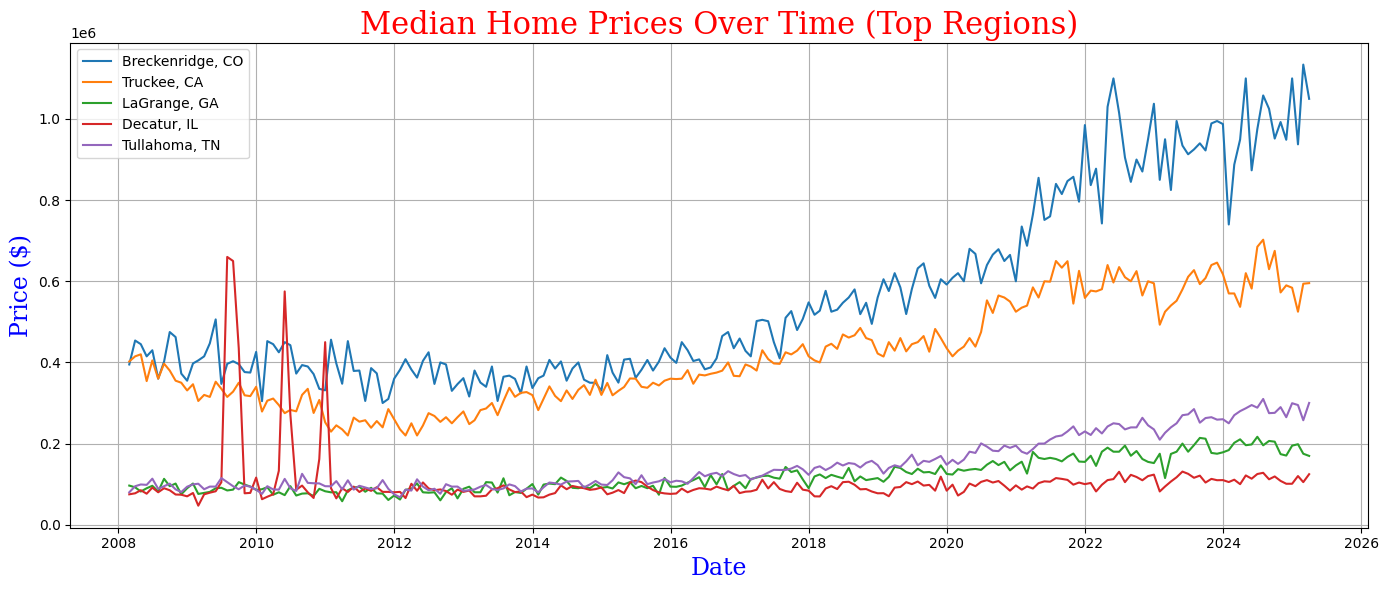

In [288]:
import matplotlib.pyplot as plt

# Choose top 5 most common regions
top_regions = df_melted['RegionName'].value_counts().index[:5]

# Line chart showing price trends for these regions
plt.figure(figsize=(14, 6))
for region in top_regions:
    region_data = df_melted[df_melted["RegionName"] == region]
    plt.plot(region_data["Date"], region_data["MedianPrice"], label=region)

font1 = {'family': 'serif', 'color': 'red', 'size': 22}
font2 = {'family': 'serif', 'color': 'blue', 'size': 17}
plt.title("Median Home Prices Over Time (Top Regions)", fontdict=font1)
plt.xlabel("Date", fontdict=font2)
plt.ylabel("Price ($)", fontdict=font2)
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

3. The Appreciation Rate per Year is calculated. Here, the earliest and latest date are identified. The Appreciation percentage is calculated from the earliest to the latest date using the formula: (latest date - earliest date)/100 * 100

In [292]:
# Get earliest and latest dates
earliest_date = df_melted["Date"].min()
latest_date = df_melted["Date"].max()

# Filter only rows for those two points in time
df_snapshot = df_melted[df_melted["Date"].isin([earliest_date, latest_date])]

# Pivot to get initial and final prices
price_comparison = df_snapshot.pivot(index="RegionName", columns="Date", values="MedianPrice").dropna()

# Calculate appreciation rate over the full period
price_comparison["AppreciationRate_%"] = (
    (price_comparison[latest_date] - price_comparison[earliest_date]) 
    / price_comparison[earliest_date]
) * 100

# Sort by highest appreciation
price_comparison_sorted = price_comparison.sort_values("AppreciationRate_%", ascending=False)

# Show top 10 markets
print(price_comparison_sorted.head(10))

Date              2008-02-29 00:00:00  2025-03-31 00:00:00  AppreciationRate_%
RegionName                                                                    
Huntsville, AL                69100.0             293897.0          325.321274
Tullahoma, TN                 79950.0             300151.0          275.423390
Sevierville, TN              134900.0             458293.0          239.727947
Sherman, TX                   84425.0             283747.0          236.093574
Muskegon, MI                  59000.0             194710.0          230.016949
Nashville, TN                143901.0             442948.0          207.814400
Greeley, CO                  156000.0             478991.0          207.045513
Denver, CO                   193450.0             589078.0          204.511760
Grand Rapids, MI             106380.0             317196.0          198.172589
Battle Creek, MI              57700.0             170282.0          195.116118


Plot 2: Bar Chart
This shows the Top 10 U.S.appreciating markets.

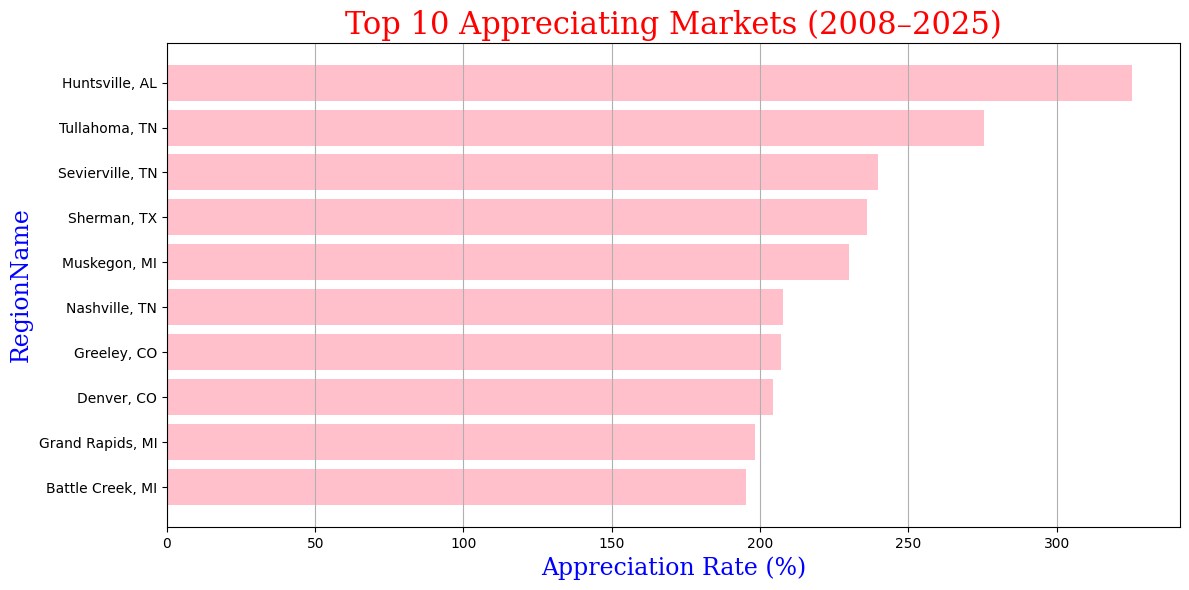

In [294]:
# Bar chart
top10 = price_comparison_sorted.head(10)
plt.figure(figsize=(12, 6))
plt.barh(top10.index[::-1], top10["AppreciationRate_%"][::-1], color="pink")
font1 = {'family': 'serif', 'color': 'red', 'size': 22}
font2 = {'family': 'serif', 'color': 'blue', 'size': 17}
plt.xlabel("Appreciation Rate (%)", fontdict=font2)
plt.title("Top 10 Appreciating Markets (2008–2025)", fontdict=font1)
plt.ylabel("RegionName", fontdict=font2)
plt.grid(axis='x')
plt.tight_layout()
plt.show()

4.Next, the ROI and Profit is calculated

This represents the Top U.S. estate markets ranked by an estimate of the ROI from 2008 to 2025 which factors rental income, appreciation, upgrade costs and sale costs.

To calculate the Profit and ROI we'll use these estimates:

Buying price: $400,000
Mortgage Down Payment: 25% of initial purchase price
Upgrade cost: $50,000
Rental yield: 6% of final sale price annually for 5 years
Holding Period: 5 years
Selling Cost: 6% of final sale price
Sale after 5 years with 6% yearly appreciation

In [296]:
# Calculate ROI from appreciation and estimated rental yield
# Assuming:
# - Rental yield: 6% of current value annually for 5 years
# - Sale appreciation as calculated
# - Selling cost: 6%
# - Initial down payment: 25%

roi_data = []
for region, row in top10.iterrows():
    initial_price = row[earliest_date]
    final_price = row[latest_date]
    rental_income = final_price * 0.06 * 5  # 6% annual rent for 5 years
    sale_proceeds = final_price * 0.94      # 6% selling cost
    upgrade_cost = 50000
    down_payment = initial_price * 0.25
    total_investment = down_payment + upgrade_cost # out of pocket capital
    profit = (sale_proceeds + rental_income - initial_price - upgrade_cost)
    roi = (profit / total_investment) * 100
    roi_data.append({
        "RegionName": region,
        "InitialPrice": initial_price,
        "FinalPrice": final_price,
        "RentalIncome": rental_income,
        "SaleProceeds": sale_proceeds,
        "TotalInvestment": total_investment,
        "Profit": profit,
        "ROI_%": roi
    })

roi_df = pd.DataFrame(roi_data)
roi_df_sorted = roi_df.sort_values("ROI_%", ascending=False)

roi_df_sorted[["RegionName", "ROI_%", "Profit"]]

,RegionName,ROI_%,Profit
7,"Denver, CO",495.114215,487006.72
2,"Sevierville, TN",457.907817,383383.32
6,"Greeley, CO",435.897573,387948.84
5,"Nashville, TN",413.321880,355354.52
0,"Huntsville, AL",364.670799,245332.28
1,"Tullahoma, TN",346.115006,242237.24
8,"Grand Rapids, MI",309.345310,236943.04
3,"Sherman, TX",305.769577,217421.28
4,"Muskegon, MI",204.541158,132440.40
9,"Battle Creek, MI",160.573815,103449.68


Plot 3: The scatter plot

It represents the relationship between the starting price(the initial price) and investment return.
                                                                                

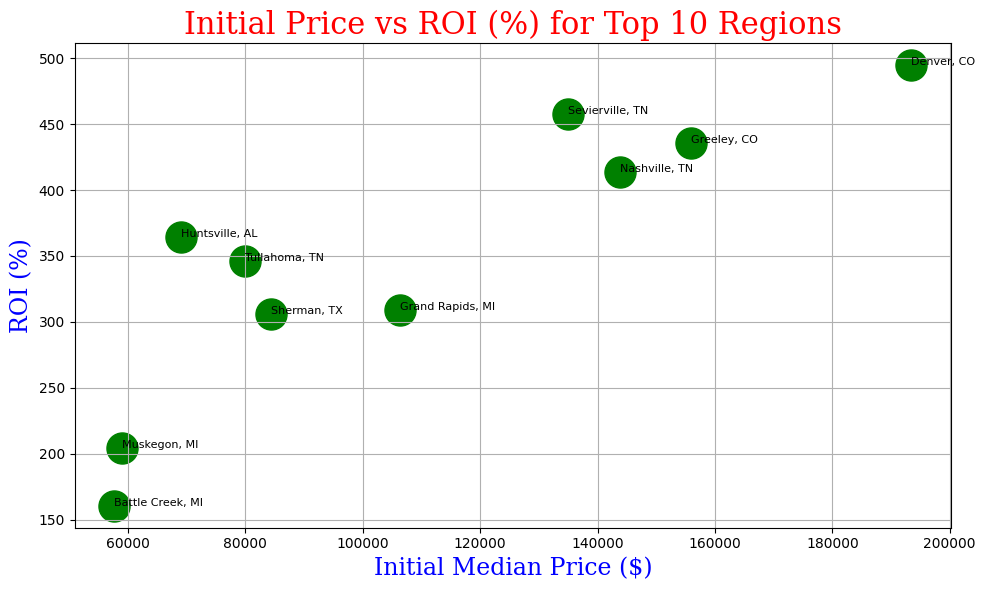

In [304]:
# Scatter plot of Initial Price vs ROI
plt.figure(figsize=(10, 6))
plt.scatter(roi_df_sorted["InitialPrice"], roi_df_sorted["ROI_%"], color="green", s=500)
for i in range(len(roi_df_sorted)):
    plt.text(roi_df_sorted["InitialPrice"].iloc[i], roi_df_sorted["ROI_%"].iloc[i], 
             roi_df_sorted["RegionName"].iloc[i], fontsize=8)
font1 = {'family': 'serif', 'color': 'red', 'size': 22}
font2 = {'family': 'serif', 'color': 'blue', 'size': 17}
plt.title("Initial Price vs ROI (%) for Top 10 Regions", fontdict=font1)
plt.xlabel("Initial Median Price ($)", fontdict=font2)
plt.ylabel("ROI (%)", fontdict=font2)
plt.grid(True)
plt.tight_layout()
plt.show()

Plot 4: Line Chart

The line Chart visualizes the price trends for the Top 5 ROI Regions which shows how prices have evolved from 2008 to2025. 

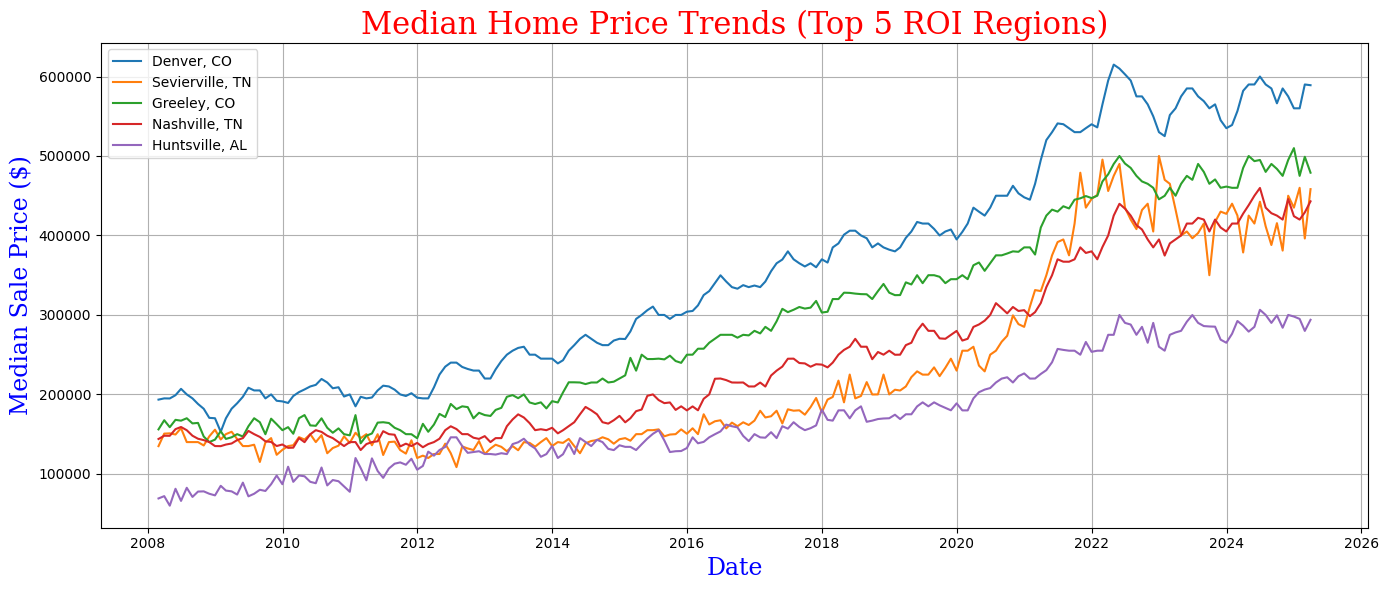

In [306]:
# Line Chart showing price evolution of top 5 ROI regions over time
top5_regions = roi_df_sorted["RegionName"].head(5)
top5_data = df_melted[df_melted["RegionName"].isin(top5_regions)]

plt.figure(figsize=(14, 6))
for region in top5_regions:
    region_data = top5_data[top5_data["RegionName"] == region]
    plt.plot(region_data["Date"], region_data["MedianPrice"], label=region)

font1 = {'family': 'serif', 'color': 'red', 'size': 22}
font2 = {'family': 'serif', 'color': 'blue', 'size': 17}
plt.title("Median Home Price Trends (Top 5 ROI Regions)", fontdict=font1)
plt.xlabel("Date", fontdict=font2)
plt.ylabel("Median Sale Price ($)", fontdict=font2)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Insight and Recommendations

Using the preferred investment strategy that is, buying single family homes or rental apartments, upgrading them, renting them out, and eventually selling, the ROI for each region was calculated assuming a 25% down payment, $50,000 in upgrades, 6% annualrental yield over five years and a 6% selling cost. 

The top performing markets by ROI include Denver, CO (495%), Sevierville, TN (458%),
and Greeley, CO (436%), each producing projected profits of $380,000 $490,000per property over the investment period. 
These regions exhibited a steady appreciation over the years which indicates economic stability, demand and low volatility. 

Huntsville and Tullahoma show high ROI despite low initial costs.

I recommend focusing on regions which high ROI, to balance appreciation potential with cash flow and market liquidity to maximize both short-term income and long-term capital gains. High ROI with low initial prices are ideal for investors who want high percentage returns despite lower upfront capital.